In [1]:
import nano as ecs
import scipy as sp
from scipy import signal
from lmfit import Model
%pylab inline 
import os
import csv
import pandas as pd
#chose lmfit over scipy due to ability to vary what parameters to solve for. 

Populating the interactive namespace from numpy and matplotlib


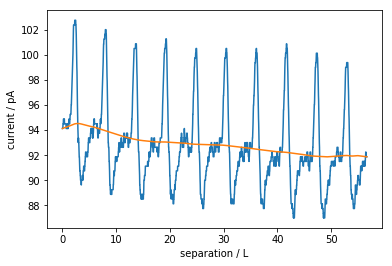

In [2]:
dire="/users/mirabala/documents/orion/Alex-scb/Data/SECM/Approach curve/180809"
os.chdir(dire)
file='180809_HOPG_appr_035_1.txt'
d=np.loadtxt(file,skiprows=1)
x=(max(d[:,0])-d[:,0])*1000/25
y=d[:,1]
plot(x,y)
xlabel('separation / L')
ylabel('current / pA')

n=200
a=1
b=[1.0/n]*n
y=signal.filtfilt(b,a,y)
plot(x,y)
y=y/y[size(y)-1]

In [3]:
k0=1 # Rate Constant | cm/s
D=10E-6 # Diffusion Coefficient | cm2/s
E=0.35 # applied potential | V
E0=0.1 # formal potential | V
alpha=0.5  # Charge transfer coefficient
F=96485  # Faraday Constant | C/mol
R=8.314 #Gas Constant | J/mol*K
T=293 #Temperature | K
f=F/(R*T)
n=1  # number of electrons per reaction 
rtip=25e-7 # Tip radius | cm
L=np.linspace(0.2,10,49) # Dimensionless Distance 
pn=0 #approach curve binary choice

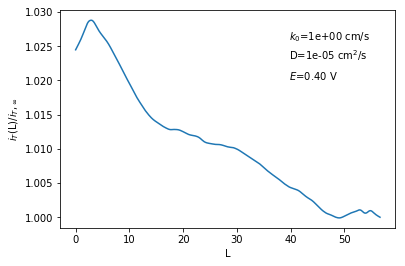

(2048,) (2048,)


In [4]:
#y=ecs.approach(L,E,E0, D=1*D, k0=1*k0)
ecs.approach_plot(x,y)
print(shape(y),shape(x))

In [5]:
fmodel=Model(ecs.approach,nan_policy='omit')
# initial values
#fmodel.set_param_hint('D', value=1e-6, min=1e-7, max=1e-3)
fmodel.set_param_hint('n', value=1, min=0, max=4)
fmodel.set_param_hint('k0', value=1, min=1e-12, max=1e2)
params = fmodel.make_params(E=E, E0=E0, D=D, rtip=rtip, alpha=alpha, T=T, pn=pn)
# fix parameters:
params['T'].vary = False
params['alpha'].vary = False
params['rtip'].vary = False
params['E0'].vary = False
params['E'].vary = False
params['D'].vary = False
params['pn'].vary = False
#fit
result = fmodel.fit(y, params, L=x)

C:\Users\mirabala\Documents\orion\Alex-scb\Code\Electrochemistry-toolkit\nano\core.py:24: RuntimeWarning: divide by zero encountered in true_divide
  m0=(4*D*(0.68+0.78377/L+0.315*py.exp(-1.0672/L)))/(py.pi*rtip)
C:\Users\mirabala\Documents\orion\Alex-scb\Code\Electrochemistry-toolkit\nano\core.py:33: RuntimeWarning: divide by zero encountered in true_divide
  I=(0.68+0.78377/L+0.315*py.exp(-1.0672/L))/(1+py.exp(n*f*(E-E0))+1/k)
C:\Users\mirabala\Documents\orion\Alex-scb\Code\Electrochemistry-toolkit\nano\core.py:33: RuntimeWarning: invalid value encountered in true_divide
  I=(0.68+0.78377/L+0.315*py.exp(-1.0672/L))/(1+py.exp(n*f*(E-E0))+1/k)


In [6]:
print(result.fit_report())

[[Model]]
    Model(approach)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 2047
    # variables        = 2
    chi-square         = 2090.86315
    reduced chi-square = 1.02242697
    Akaike info crit   = 47.3998030
    Bayesian info crit = 58.6480642
[[Variables]]
    E:      0.35 (fixed)
    E0:     0.1 (fixed)
    D:      1e-05 (fixed)
    k0:     81.0753451 (init = 1)
    pn:     0 (fixed)
    T:      293 (fixed)
    alpha:  0.5 (fixed)
    n:      1.00000000 (init = 1)
    rtip:   2.5e-06 (fixed)



In [7]:
k0_fit=result.params['k0'].value
n_fit=result.params['n'].value

In [8]:
y_fit=ecs.approach(x, E, E0=, D=D, rtip=rtip, alpha=alpha, T=T, pn=pn, k0=0.1*k0_fit, n=n_fit)
np.argwhere(np.isnan(y_fit))
print(y_fit)

x_fit = x[~numpy.isnan(y_fit)]
y_fit = y_fit[~numpy.isnan(y_fit)]

plot(x_fit,y_fit)
plot(x,y)
show()

SyntaxError: invalid syntax (<ipython-input-8-03edfec0de12>, line 1)

In [ ]:
df=pd.read_csv("~/documents/orion/Alex-scb/Data/SECM/Approach curve/Approach Curve.csv")

df=df.append({'dir':dire,'file':file,'k0':k0_fit,'E0':E0,'E':E,'D':D,'rtip':rtip,'pn':pn,'T':T,'alpha':alpha,'n':n_fit},ignore_index=True)
print(df)

df.to_csv("/users/mirabala/documents/orion/Alex-scb/Data/SECM/Approach curve/Approach Curve.csv")